In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("creditcard.csv")

In [8]:
#Number of Columns & Rows
num_rows, num_columns = df.shape
print(f"Dataset contains {num_rows} rows and {num_columns} columns.")

Dataset contains 284807 rows and 31 columns.


In [9]:
#Percent of Missing Values by Column
missing_values_percent = (df.isnull().sum() / num_rows) * 100
print("\nMissing Values in Each Column (%):")
print(missing_values_percent[missing_values_percent > 0])


Missing Values in Each Column (%):
Series([], dtype: float64)


In [10]:
#Statistical Measures: Mean, Median, Mode, Variance
summary_stats = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0], 
    "Variance": df.var()
})
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                Mean        Median           Mode      Variance
Time    9.481386e+04  84692.000000  163152.000000  2.255124e+09
V1      1.168375e-15      0.018109       1.245674  3.836489e+00
V2      3.416908e-16      0.065486      -0.326668  2.726820e+00
V3     -1.379537e-15      0.179846      -2.752041  2.299029e+00
V4      2.074095e-15     -0.019847      -0.842316  2.004684e+00
V5      9.604066e-16     -0.054336      -0.562777  1.905081e+00
V6      1.487313e-15     -0.274187      -1.011073  1.774946e+00
V7     -5.556467e-16      0.040103      -0.432126  1.530401e+00
V8      1.213481e-16      0.022358      -0.160211  1.426479e+00
V9     -2.406331e-15     -0.051429       0.170362  1.206992e+00
V10     2.239053e-15     -0.092917      -0.075186  1.185594e+00
V11     1.673327e-15     -0.032757      -0.356749  1.041855e+00
V12    -1.247012e-15      0.140033      -0.073460  9.984034e-01
V13     8.190001e-16     -0.013568      -0.517760  9.905708e-01
V14     1.207294e-1

In [11]:
# Correlation Matrix
correlation_matrix = df.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.188326e-16 -1.164018e-15 -9.082889e-16   
V2     -0.010593  4.188326e-16  1.000000e+00  3.140164e-16 -1.125909e-15   
V3     -0.419618 -1.164018e-15  3.140164e-16  1.000000e+00  4.644369e-16   
V4     -0.105260 -9.082889e-16 -1.125909e-15  4.644369e-16  1.000000e+00   
V5      0.173072  2.085924e-17  5.230686e-16 -5.483554e-17 -1.722056e-15   
V6     -0.063016 -6.343731e-16  2.781752e-16  1.627805e-15 -7.565957e-16   
V7      0.084714 -1.018099e-15  1.857398e-16  5.239200e-16 -4.188169e-16   
V8     -0.036949 -2.557889e-16 -5.698764e-17 -1.297365e-15  5.645256e-16   
V9     -0.008660 -1.347621e-16  2.006267e-17  5.725902e-16  6.873528e-16   
V10     0.030617  7.340779e-17 -3.930237e-16  1.157736e-15  2.203905e-16   
V11    -0.247689  2.248163e-16  1.965104e-16  1.603095e-15  3.498520e-16   
V12     0.12

In [12]:
# Outlier Detection using IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers in Each Column:")
print(outliers[outliers > 0]) 


Number of Outliers in Each Column:
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


In [13]:
# Summary statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [14]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

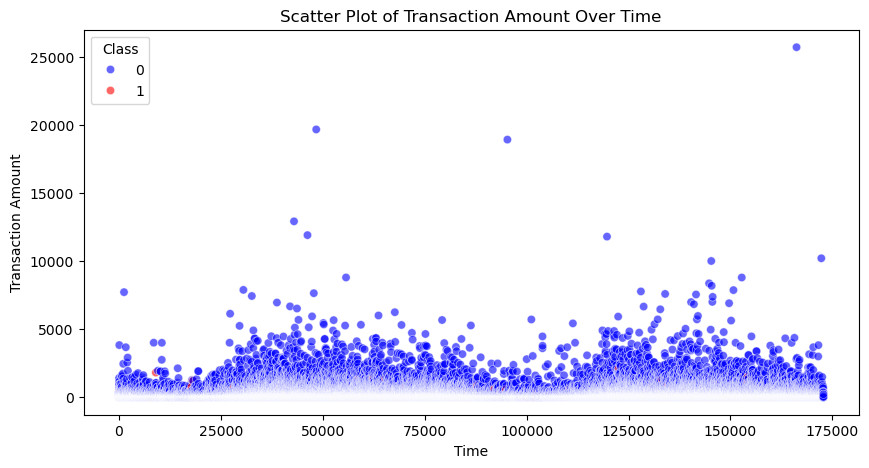

In [15]:
# Data Visualizations
# Scatter Plot: Transaction Amount vs. Time (Color-coded by Fraud)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Time"], y=df["Amount"], hue=df["Class"], alpha=0.6, palette={0: "blue", 1: "red"})
plt.title("Scatter Plot of Transaction Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.show()

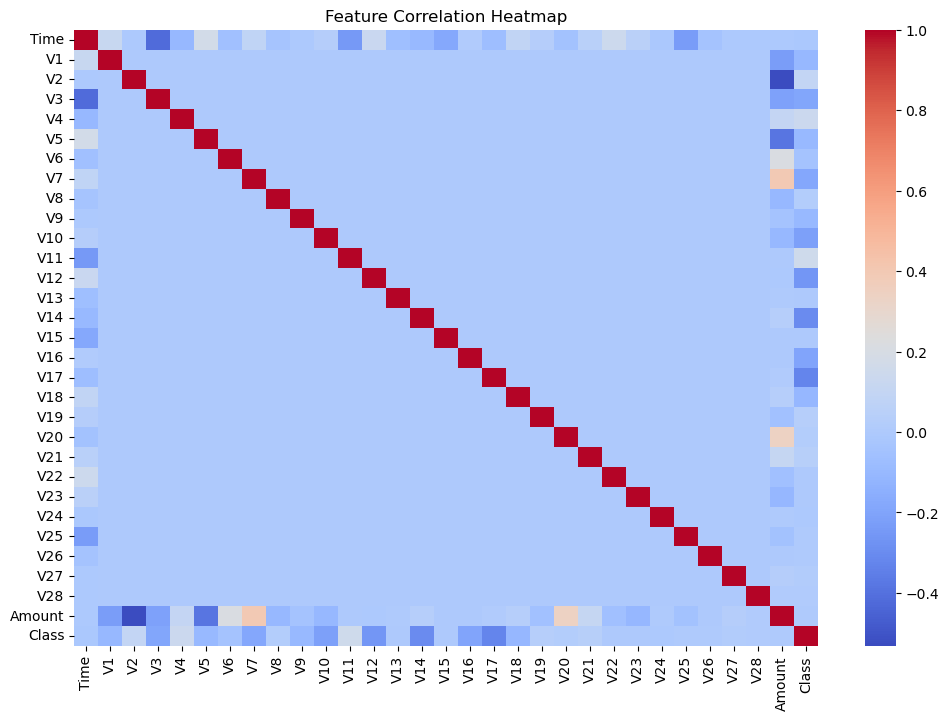

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


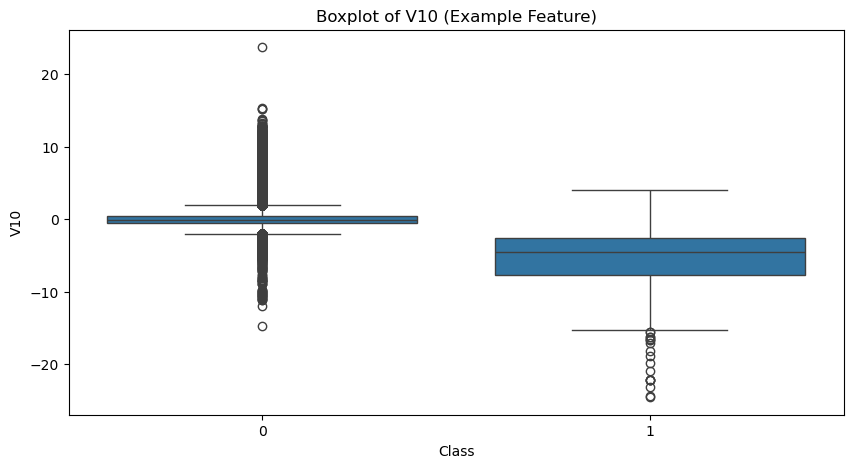

In [17]:
# Boxplots of selected features to detect fraud patterns
fraud_df = df[df["Class"] == 1]
non_fraud_df = df[df["Class"] == 0]

plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="V10", data=df)
plt.title("Boxplot of V10 (Example Feature)")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [19]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

In [20]:
# Split features and target
X = df.drop(columns=["Class"])  
y = df["Class"] 

In [21]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
# Verify new class balance after SMOTE
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import time

In [25]:
# Feature Scaling (Add this before training)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Scale training data
X_test = scaler.transform(X_test)  # Scale test data

In [26]:
# Function to train and evaluate models (Same as before)
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Performance metrics
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Training Time: {round(time.time() - start_time, 2)} seconds")

In [27]:
# Initialize models with fixes
log_reg = LogisticRegression(max_iter=5000, solver="saga") 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate models
for model in [log_reg, rf_clf]:
    train_evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)


Model: LogisticRegression
Accuracy: 0.9894666619851831
AUC-ROC Score: 0.976604490628553
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Training Time: 323.66 seconds

Model: RandomForestClassifier
Accuracy: 0.999403110845827
AUC-ROC Score: 0.9691426303216842
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Training Time: 219.67 seconds


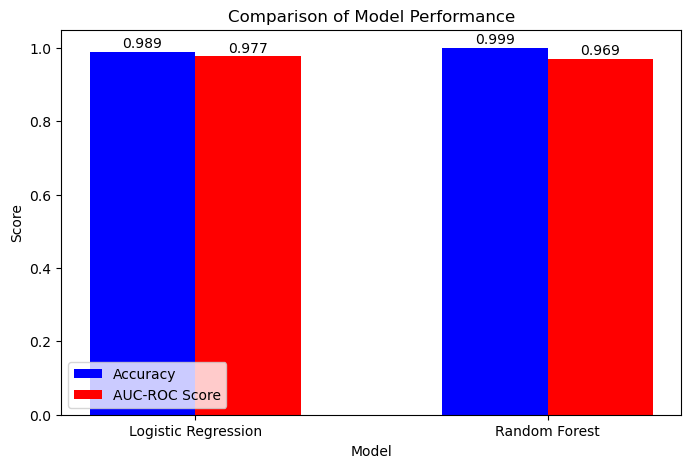

In [69]:
# Compute Accuracy and AUC-ROC Scores dynamically
models = ["Logistic Regression", "Random Forest"]
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test)),  
    accuracy_score(y_test, rf_clf.predict(X_test))   
]

auc_roc_scores = [
    roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),  
    roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])    
]

# Create bar chart for Accuracy & AUC-ROC Scores
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracies, width, label="Accuracy", color="blue")
bars2 = ax.bar(x + width/2, auc_roc_scores, width, label="AUC-ROC Score", color="red")

ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,1), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()